In [1]:
import torch.nn as nn
from seagul.rl.ppo2 import ppo
from seagul.rl.policies import Categorical_MLP, MLP
import torch
import pybullet_envs

import matplotlib.pyplot as plt
import numpy as np

init
options= 


100%|██████████| 250/250 [1:13:57<00:00, 20.69s/it]


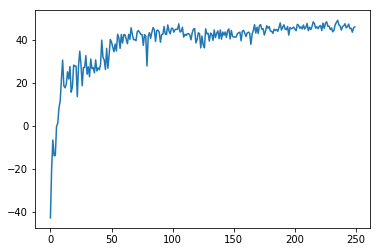

In [27]:
torch.set_default_dtype(torch.double)

#policy = Categorical_MLP(input_size=4, output_size=1, layer_size=12, num_layers=2, activation=nn.ReLU)
policy =  MLP(input_size=7, output_size=2, layer_size=24, num_layers=2, activation=nn.ReLU)
value_fn = MLP(input_size=7, output_size=1, layer_size=24, num_layers=2, activation=nn.ReLU)

# Define our hyper parameters
num_epochs = 100
batch_size = 2048  # how many steps we want to use before we update our gradients
num_steps = 1000 # number of steps in an episode (unless we terminate early)
max_reward = num_steps
p_batch_size = 1024
v_epochs = 1
p_epochs = 10
p_lr = 1e-2
v_lr = 1e-2

gamma = .99
lam = .99
eps = .2

variance = 0.7 # feel like there should be a better way to do this...

#env2, t_policy, t_val, rewards = ppo('InvertedPendulum-v2', 100, policy, value_fn) 
#env2, t_policy, t_val, rewards = ppo('CartPole-v0', 100, policy, value_fn) 

env, t_policy, t_val, rewards = ppo('bullet_car-v0', 250, policy, value_fn) 

plt.plot(rewards)

sum of rewards =  -37.97838381801004
[-37.97838382]


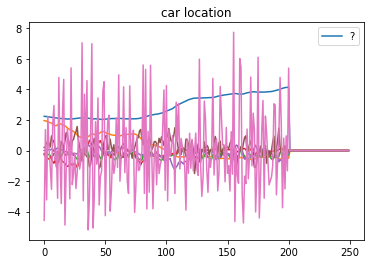

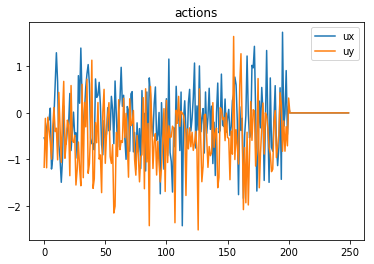

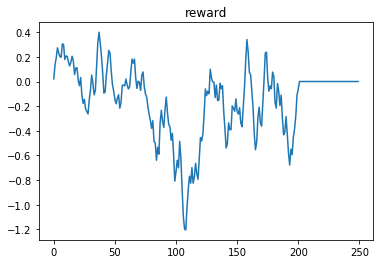

In [14]:
import gym
from seagul.rl.ppo2 import select_cont_action as select_action
torch.set_default_dtype(torch.double)

#policy = MLP(input_size=7, output_size=2, layer_size=24, num_layers=2, activation=nn.ReLU)
#policy.load_state_dict(torch.load('./seagul_car'))


#env = gym.make('bullet_car-v0')


state = env.reset()
for _ in range(250):
    action, logprob = select_action(policy, state)
    state_np, reward, done, _ = env.step(action.numpy())
    state = torch.as_tensor(state_np)
    #env.render()


# Plot results 
#goal = myenv.goal

print('sum of rewards = ' , np.sum(reward_hist))

plt.plot(state_hist)
plt.title('states')
plt.legend (('?'))

plt.title('car location')

plt.figure()
plt.plot(action_hist)
plt.title('actions')
plt.legend (('ux', 'uy', 'uz'))

plt.plot

plt.figure()
plt.plot(reward_hist)
plt.title('reward')

print(sum(reward_hist))
    

sum of rewards =  53.032507397730534
[53.0325074]


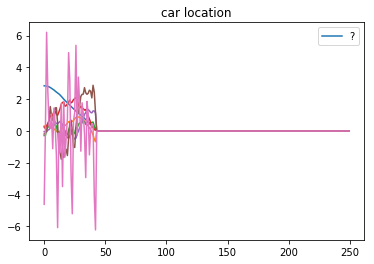

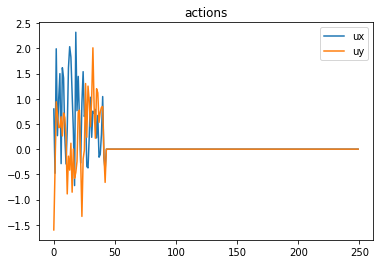

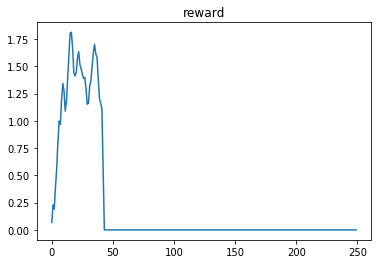

In [26]:
# This cell is optional
# Run single episode (will also render if you have that set)

#myenv = env.envs[0].env.env # OpenAI uses a bunch of wrappers around my env that don't maintain the member variables I put it
myenv = env.env
myenv.num_steps=250

# Intialize action, state, and reward histories
action_hist = np.zeros((myenv.num_steps, myenv.action_space.shape[0]))
state_hist = np.zeros((myenv.num_steps, myenv.observation_space.shape[0]))
reward_hist = np.zeros((myenv.num_steps, 1))

# Run a single episode, this will render if you have that set in the environement or baselines
state = env.reset()
for i in range(myenv.num_steps):
        action, logprob = select_action(policy2, state)
        state_np, reward, done, _ = env.step(action.numpy())
        state = torch.as_tensor(state_np)
        
        action_hist[i,:] = np.copy(action)
        state_hist[i,:] = np.copy(state_np)
        reward_hist[i,:] = np.copy(reward)
        #env.render()
        if done:
            break
            
# Plot results 
goal = myenv.goal

print('sum of rewards = ' , np.sum(reward_hist))

plt.plot(state_hist)
plt.title('states')
plt.legend (('?'))

plt.title('car location')

plt.figure()
plt.plot(action_hist)
plt.title('actions')
plt.legend (('ux', 'uy', 'uz'))

plt.plot

plt.figure()
plt.plot(reward_hist)
plt.title('reward')

print(sum(reward_hist))

In [23]:
torch.save(policy, './seagul_car')

In [24]:
policy2 = torch.load('./seagul_car')

In [49]:
import copy
policy2 = copy.deepcopy(policy)

OrderedDict([('layers.0.weight',
              tensor([[ 3.3099e-01,  1.5350e-01,  9.9931e-02,  3.1309e-01,  7.9001e-02,
                        1.5113e-01, -1.9239e-01],
                      [-6.8774e-02,  1.0374e-02, -1.5033e-01, -1.3850e-01, -5.4165e-01,
                       -2.5412e-01,  4.0306e-02],
                      [ 2.7813e-03, -1.2793e-01,  3.9611e-02, -1.1623e-01,  4.1520e-02,
                        2.0009e-01, -2.5961e-01],
                      [ 1.6728e-01, -2.0026e-01,  1.9405e-01, -2.7705e-01,  1.7672e-01,
                        6.1286e-02,  1.3106e-01],
                      [ 2.6997e-01, -3.5906e-01,  3.6342e-01,  7.3181e-02, -1.2985e-01,
                       -1.5690e-01, -8.1093e-03],
                      [ 3.4647e-01, -2.1119e-01,  2.9622e-02,  2.8622e-01, -2.3325e-01,
                       -1.7377e-01, -3.9899e-01],
                      [ 2.6591e-01, -2.4177e-01,  2.1568e-01, -4.8848e-02,  3.7263e-01,
                       -2.7090e-01,  3.5797e-01],
 